In [73]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

In [74]:
#!locale-gen "pt_BR.UTF-8"

In [146]:
import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)


# **BOOTCAMP DATA SCIENCE ALURA - SEMANA 04**

## **AULA 01 - SÉRIE TEMPORAL**

In [76]:
url = 'https://raw.githubusercontent.com/alura-cursos/serie_temporal_bootcamp/main/tuberculose_ano_mes_diagnostico.csv'

In [77]:
dados = pd.read_csv(url, encoding='ISO-8859-1', sep=';', skiprows=3, skipfooter=17, engine='python')

In [78]:
dados

,Ano Diagnóstico,Jan,Fev,Mar,Abr,Mai,Jun,Jul,Ago,Set,Out,Nov,Dez,Total
0,2001,8088,6542,8095,7305,7656,6805,6987,8065,6697,7524,6874,6627,87265
1,2002,8013,7346,7961,8771,7784,6713,7746,8330,7654,8200,7532,6809,92859
2,2003,8115,7985,7474,7975,8024,7082,7949,7585,8136,8521,7624,7303,93773
3,2004,7574,6743,8574,8089,7763,7314,7825,8232,7901,8016,7753,7196,92980
4,2005,7432,6748,8441,7958,8019,7781,7282,8391,7690,7186,7587,7541,92056
5,2006,7385,6687,8132,6804,7593,6984,7101,7722,6793,7005,6674,6151,85031
6,2007,7342,6204,8115,7266,7368,6591,7184,7564,6712,7465,6695,6094,84600
7,2008,7355,6646,7278,7612,6895,6929,7688,7797,7631,7564,6799,6574,86768
8,2009,7113,6452,8146,7514,7168,6702,7443,7368,7388,7285,7016,6723,86318
9,2010,6912,6403,8308,7049,6973,6621,7128,7389,7165,7210,7047,7176,85381


### Transformando a base de dados em uma série temporal.

In [79]:
#excluindo a coluna Total
dados.drop('Total', axis=1, inplace=True)

In [80]:
dados

,Ano Diagnóstico,Jan,Fev,Mar,Abr,Mai,Jun,Jul,Ago,Set,Out,Nov,Dez
0,2001,8088,6542,8095,7305,7656,6805,6987,8065,6697,7524,6874,6627
1,2002,8013,7346,7961,8771,7784,6713,7746,8330,7654,8200,7532,6809
2,2003,8115,7985,7474,7975,8024,7082,7949,7585,8136,8521,7624,7303
3,2004,7574,6743,8574,8089,7763,7314,7825,8232,7901,8016,7753,7196
4,2005,7432,6748,8441,7958,8019,7781,7282,8391,7690,7186,7587,7541
5,2006,7385,6687,8132,6804,7593,6984,7101,7722,6793,7005,6674,6151
6,2007,7342,6204,8115,7266,7368,6591,7184,7564,6712,7465,6695,6094
7,2008,7355,6646,7278,7612,6895,6929,7688,7797,7631,7564,6799,6574
8,2009,7113,6452,8146,7514,7168,6702,7443,7368,7388,7285,7016,6723
9,2010,6912,6403,8308,7049,6973,6621,7128,7389,7165,7210,7047,7176


## **AULA 02 - MANIPULAÇÃO DE DATAS**

In [81]:
#transformar a base em ano/Mês
dados_st = dados.melt(id_vars="Ano Diagnóstico", value_name='Casos', var_name="Mês" )

In [82]:
dados_st

,Ano Diagnóstico,Mês,Casos
0,2001,Jan,8088
1,2002,Jan,8013
2,2003,Jan,8115
3,2004,Jan,7574
4,2005,Jan,7432
...,...,...,...
223,2015,Dez,6844
224,2016,Dez,6672
225,2017,Dez,7020
226,2018,Dez,6900


In [83]:
dados_st.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 228 entries, 0 to 227
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Ano Diagnóstico  228 non-null    int64 
 1   Mês              228 non-null    object
 2   Casos            228 non-null    int64 
dtypes: int64(2), object(1)
memory usage: 5.5+ KB


In [84]:
import locale
locale.setlocale(locale.LC_ALL, 'pt_BR.UTF-8')

'pt_BR.UTF-8'

In [85]:
dados_st['data'] = dados_st['Ano Diagnóstico'].astype(str)+'-'+dados_st['Mês']

In [86]:
"""meses_port_ing = {
    'Jan': 'Jan',
    'Fev': 'Feb',
    'Mar': 'Mar',
    'Abr': 'Apr',
    'Mai': 'May',
    'Jun': 'Jun',
    'Jul': 'Jul',
    'Ago': 'Aug',
    'Set': 'Sep',
    'Out': 'Oct',
    'Nov': 'Nov',
    'Dez': 'Dec'
}"""

"meses_port_ing = {\n    'Jan': 'Jan',\n    'Fev': 'Feb',\n    'Mar': 'Mar',\n    'Abr': 'Apr',\n    'Mai': 'May',\n    'Jun': 'Jun',\n    'Jul': 'Jul',\n    'Ago': 'Aug',\n    'Set': 'Sep',\n    'Out': 'Oct',\n    'Nov': 'Nov',\n    'Dez': 'Dec'\n}"

In [87]:
#dados_st['Mês'] = dados_st['Mês'].map(meses_port_ing) 

In [88]:
dados_st

,Ano Diagnóstico,Mês,Casos,data
0,2001,Jan,8088,2001-Jan
1,2002,Jan,8013,2002-Jan
2,2003,Jan,8115,2003-Jan
3,2004,Jan,7574,2004-Jan
4,2005,Jan,7432,2005-Jan
...,...,...,...,...
223,2015,Dez,6844,2015-Dez
224,2016,Dez,6672,2016-Dez
225,2017,Dez,7020,2017-Dez
226,2018,Dez,6900,2018-Dez


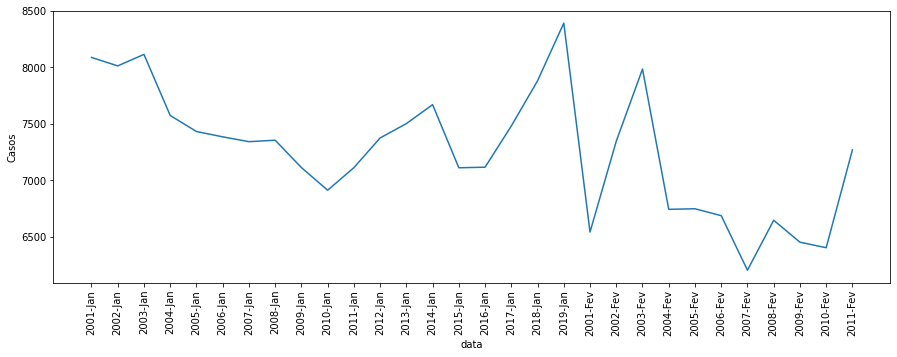

In [89]:
plt.figure(figsize=(15,5))
sns.lineplot(x='data', y='Casos', data= dados_st[:30])
plt.xticks(rotation=90) ;

In [90]:
dados_st.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 228 entries, 0 to 227
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Ano Diagnóstico  228 non-null    int64 
 1   Mês              228 non-null    object
 2   Casos            228 non-null    int64 
 3   data             228 non-null    object
dtypes: int64(2), object(2)
memory usage: 7.2+ KB


In [91]:
dados_st['Data'] = pd.to_datetime(dados_st['data'], format='%Y-%b')

In [92]:
dados_st

,Ano Diagnóstico,Mês,Casos,data,Data
0,2001,Jan,8088,2001-Jan,2001-01-01
1,2002,Jan,8013,2002-Jan,2002-01-01
2,2003,Jan,8115,2003-Jan,2003-01-01
3,2004,Jan,7574,2004-Jan,2004-01-01
4,2005,Jan,7432,2005-Jan,2005-01-01
...,...,...,...,...,...
223,2015,Dez,6844,2015-Dez,2015-12-01
224,2016,Dez,6672,2016-Dez,2016-12-01
225,2017,Dez,7020,2017-Dez,2017-12-01
226,2018,Dez,6900,2018-Dez,2018-12-01


In [93]:
dados_st = dados_st[['Data', 'Casos']]
dados_st

,Data,Casos
0,2001-01-01,8088
1,2002-01-01,8013
2,2003-01-01,8115
3,2004-01-01,7574
4,2005-01-01,7432
...,...,...
223,2015-12-01,6844
224,2016-12-01,6672
225,2017-12-01,7020
226,2018-12-01,6900


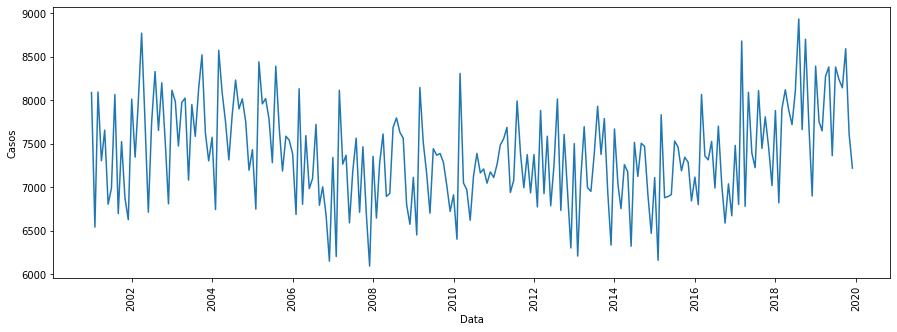

In [94]:
plt.figure(figsize=(15,5))
sns.lineplot(x='Data', y='Casos', data= dados_st)
plt.xticks(rotation=90) ;

## **AULA 03 - INICIANDO A ANÁLISE DE SÉRIE TEMPORAL**

In [95]:
dados_st.sort_values(by=['Data'], inplace=True)
dados_st.reset_index(drop=True, inplace=True)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [96]:
dados_st

,Data,Casos
0,2001-01-01,8088
1,2001-02-01,6542
2,2001-03-01,8095
3,2001-04-01,7305
4,2001-05-01,7656
...,...,...
223,2019-08-01,8239
224,2019-09-01,8143
225,2019-10-01,8592
226,2019-11-01,7615


In [97]:
#média móvel a cada 3 meses
dados_st['Media_movel_3'] = dados_st['Casos'].rolling(3).mean()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


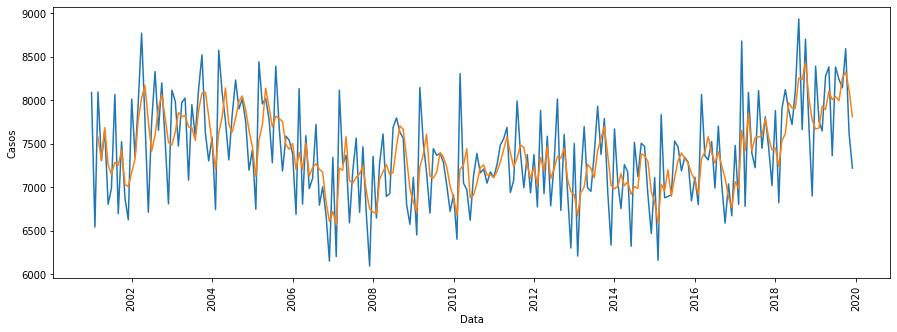

In [98]:
plt.figure(figsize=(15,5))
sns.lineplot(x='Data', y='Casos', data= dados_st)
sns.lineplot(x='Data', y='Media_movel_3', data= dados_st)
plt.xticks(rotation=90) ;

In [99]:
dados_st['Media_movel_6'] = dados_st['Casos'].rolling(6).mean()



/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


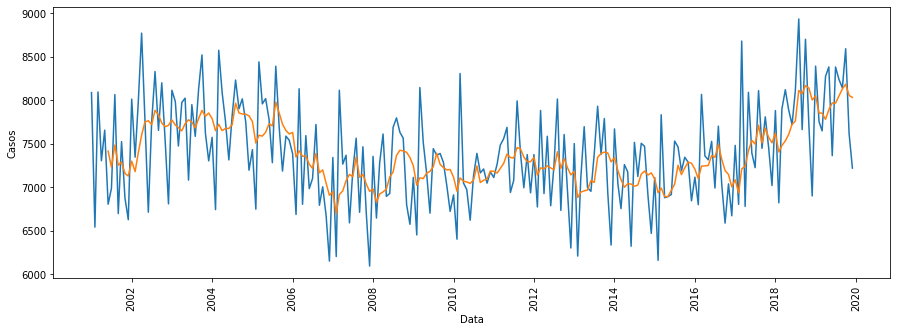

In [100]:
plt.figure(figsize=(15,5))
sns.lineplot(x='Data', y='Casos', data= dados_st)
sns.lineplot(x='Data', y='Media_movel_6', data= dados_st)
plt.xticks(rotation=90) ;

In [101]:
dados_st

,Data,Casos,Media_movel_3,Media_movel_6
0,2001-01-01,8088,NaN,NaN
1,2001-02-01,6542,NaN,NaN
2,2001-03-01,8095,7575.000000,NaN
3,2001-04-01,7305,7314.000000,NaN
4,2001-05-01,7656,7685.333333,NaN
...,...,...,...,...
223,2019-08-01,8239,7994.666667,8048.166667
224,2019-09-01,8143,8254.666667,8130.666667
225,2019-10-01,8592,8324.666667,8183.666667
226,2019-11-01,7615,8116.666667,8055.666667


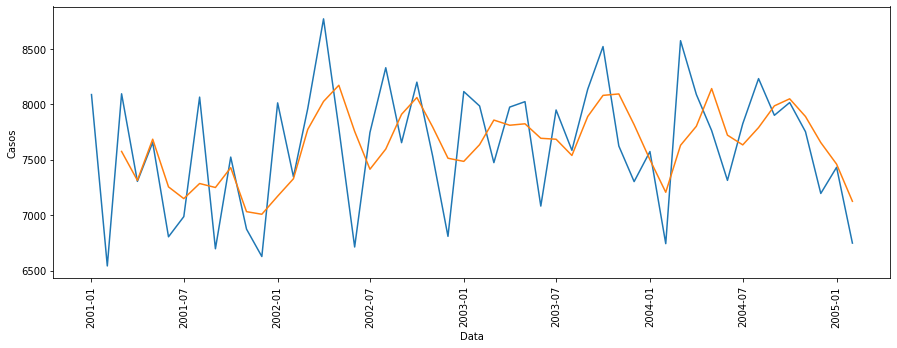

In [102]:
plt.figure(figsize=(15,5))
sns.lineplot(x='Data', y='Casos', data= dados_st[:50])
sns.lineplot(x='Data', y='Media_movel_3', data= dados_st[:50])
plt.xticks(rotation=90) ;

In [103]:
#criando uma média movel centrada
dados_st['Media_movel_3c'] = dados_st['Casos'].rolling(3, center=True).mean()

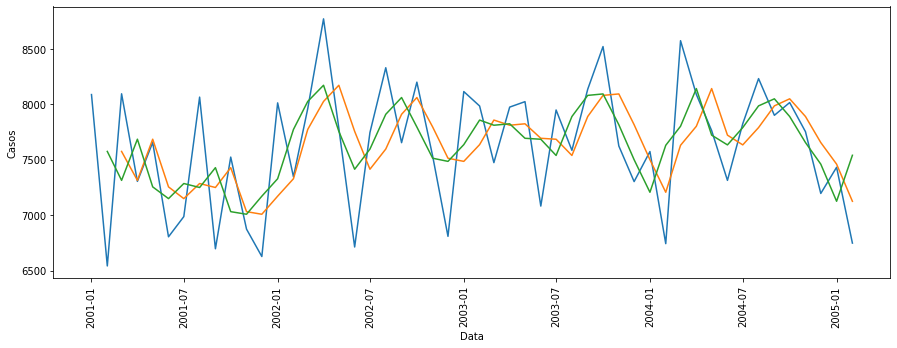

In [104]:
plt.figure(figsize=(15,5))
sns.lineplot(x='Data', y='Casos', data= dados_st[:50])
sns.lineplot(x='Data', y='Media_movel_3', data= dados_st[:50])
sns.lineplot(x='Data', y='Media_movel_3c', data= dados_st[:50])
plt.xticks(rotation=90) ;

## **AULA 04 - DECOMPOSIÇÃO E AUTOCORRELAÇÃO**

In [105]:
dados_date = dados_st.set_index('Data')

In [106]:
dados_date

,Casos,Media_movel_3,Media_movel_6,Media_movel_3c
Data,,,,
2001-01-01,8088,NaN,NaN,NaN
2001-02-01,6542,NaN,NaN,7575.000000
2001-03-01,8095,7575.000000,NaN,7314.000000
2001-04-01,7305,7314.000000,NaN,7685.333333
2001-05-01,7656,7685.333333,NaN,7255.333333
...,...,...,...,...
2019-08-01,8239,7994.666667,8048.166667,8254.666667
2019-09-01,8143,8254.666667,8130.666667,8324.666667
2019-10-01,8592,8324.666667,8183.666667,8116.666667


In [107]:
dados_st['Ano'] = dados_st['Data'].dt.year

In [108]:
dados_st['Mes'] = dados_st['Data'].dt.month

In [109]:
dados_st

,Data,Casos,Media_movel_3,Media_movel_6,Media_movel_3c,Ano,Mes
0,2001-01-01,8088,NaN,NaN,NaN,2001,1
1,2001-02-01,6542,NaN,NaN,7575.000000,2001,2
2,2001-03-01,8095,7575.000000,NaN,7314.000000,2001,3
3,2001-04-01,7305,7314.000000,NaN,7685.333333,2001,4
4,2001-05-01,7656,7685.333333,NaN,7255.333333,2001,5
...,...,...,...,...,...,...,...
223,2019-08-01,8239,7994.666667,8048.166667,8254.666667,2019,8
224,2019-09-01,8143,8254.666667,8130.666667,8324.666667,2019,9
225,2019-10-01,8592,8324.666667,8183.666667,8116.666667,2019,10
226,2019-11-01,7615,8116.666667,8055.666667,7809.000000,2019,11


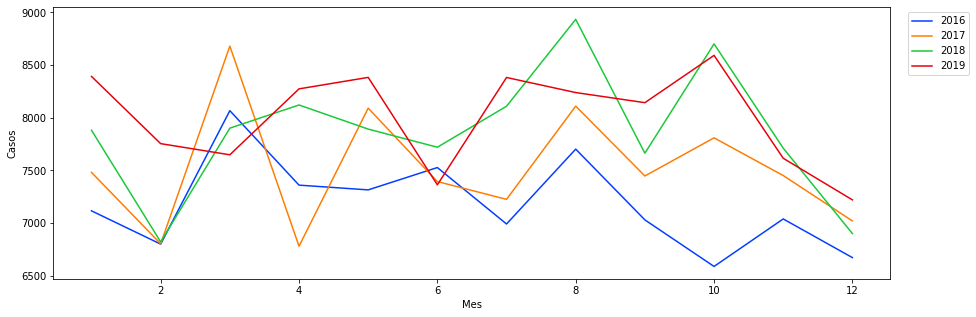

In [110]:
plt.figure(figsize=(15,5))
sns.lineplot(x='Mes', y='Casos', hue='Ano', data=dados_st.query('Ano in [2019,2018,2017,2016] '),palette='bright')
plt.legend(loc='upper right', bbox_to_anchor=(1, 1, 0.1, 0));

In [111]:
#biblioteca para decompor a série temporal
from statsmodels.tsa.seasonal import seasonal_decompose

In [112]:
#decomposição da série temporal
decomposicao = seasonal_decompose(dados_date['Casos'])

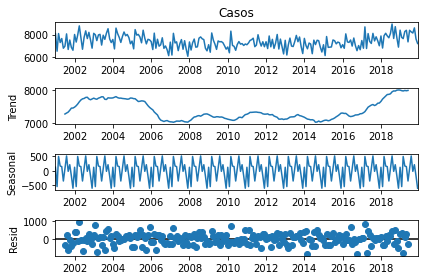

In [113]:
decomposicao.plot();

In [114]:
#decomposição da série temporal
decomposicao = seasonal_decompose(dados_date['Casos'],model='multiplicative')

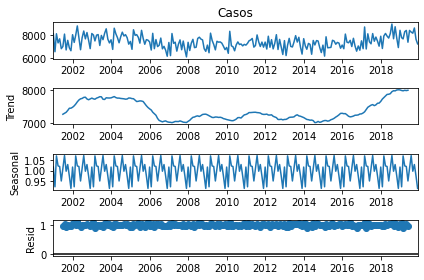

In [115]:
decomposicao.plot();

In [116]:
url_passageiros = 'https://raw.githubusercontent.com/alura-cursos/serie_temporal_bootcamp/main/AirPassengers.csv'

In [117]:
dados_passageiros = pd.read_csv(url_passageiros)

In [118]:
dados_passageiros.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Month        144 non-null    object
 1   #Passengers  144 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 2.4+ KB


In [119]:
dados_passageiros['Month'] = pd.to_datetime(dados_passageiros['Month'])

In [120]:
dados_passageiros

,Month,#Passengers
0,1949-01-01,112
1,1949-02-01,118
2,1949-03-01,132
3,1949-04-01,129
4,1949-05-01,121
...,...,...
139,1960-08-01,606
140,1960-09-01,508
141,1960-10-01,461
142,1960-11-01,390


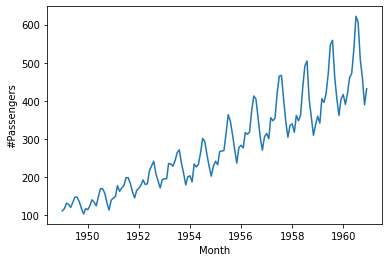

In [121]:
sns.lineplot(x='Month', y='#Passengers', data=dados_passageiros);

In [122]:
dados_passageiros.set_index('Month')

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121
...,...
1960-08-01,606
1960-09-01,508
1960-10-01,461


In [123]:
decomposicao_p = seasonal_decompose(dados_passageiros.set_index('Month'))

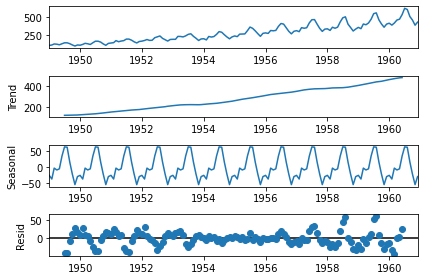

In [124]:
decomposicao_p.plot();

In [125]:
decomposicao_p = seasonal_decompose(dados_passageiros.set_index('Month'), model='multiplicative')

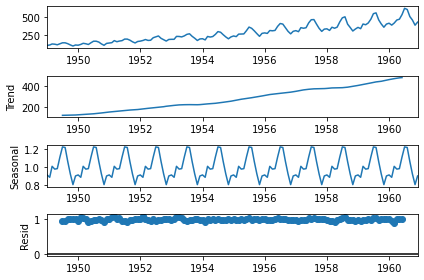

In [126]:
decomposicao_p.plot();

In [127]:
#importando os plots de autocorrelação e autocorrelação parcial
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

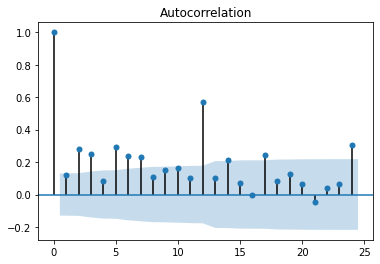

In [128]:
plot_acf(dados_st['Casos']);

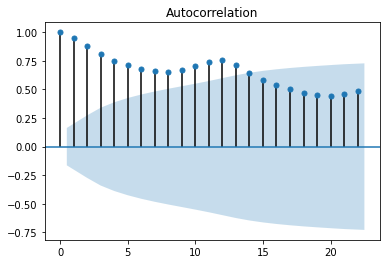

In [129]:
plot_acf(dados_passageiros.set_index('Month'));

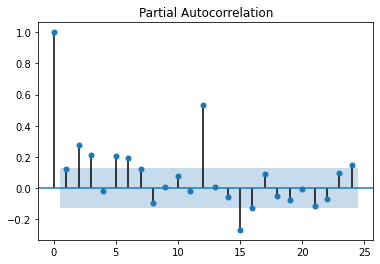

In [130]:
plot_pacf(dados_st['Casos']);

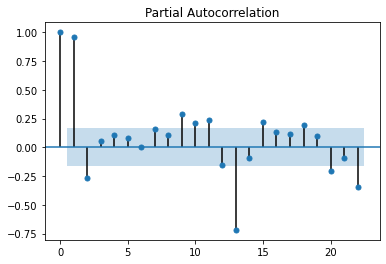

In [131]:
plot_pacf(dados_passageiros.set_index('Month'));

## **AULA 05 - PREVISÕES EM SÉRIES TEMPORAIS**

In [132]:
dados_passageiros.rename({'Month': 'Data',
                          '#Passengers': 'Passageiros'},
                         axis=1,
                         inplace=True)

In [133]:
dados_passageiros['Mes'] = dados_passageiros['Data'].dt.month

In [134]:
dados_passageiros['Ano'] = dados_passageiros['Data'].dt.year

In [135]:
dados_passageiros

,Data,Passageiros,Mes,Ano
0,1949-01-01,112,1,1949
1,1949-02-01,118,2,1949
2,1949-03-01,132,3,1949
3,1949-04-01,129,4,1949
4,1949-05-01,121,5,1949
...,...,...,...,...
139,1960-08-01,606,8,1960
140,1960-09-01,508,9,1960
141,1960-10-01,461,10,1960
142,1960-11-01,390,11,1960


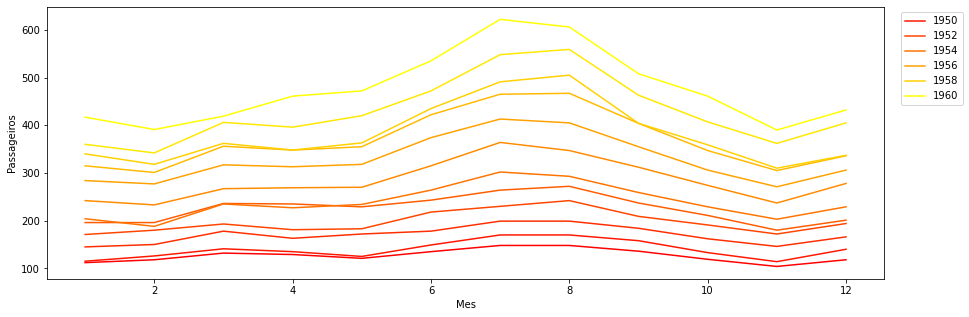

In [136]:
plt.figure(figsize=(15,5))
sns.lineplot(x='Mes', y='Passageiros', hue='Ano', data=dados_passageiros,palette='autumn')
plt.legend(loc='upper right', bbox_to_anchor=(1, 1, 0.1, 0));

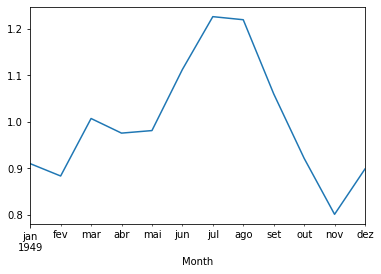

In [137]:
decomposicao_p.seasonal[:12].plot();

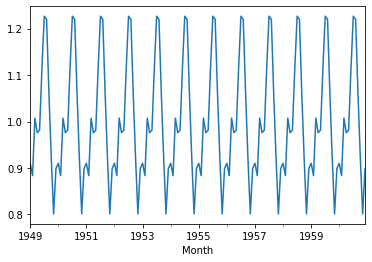

In [138]:
decomposicao_p.seasonal.plot();

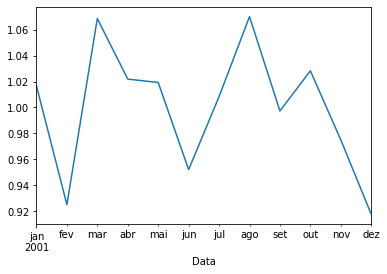

In [139]:
decomposicao.seasonal[:12].plot();

In [148]:
#fazendo previsões de séries temporais
from statsmodels.tsa.arima_model import ARIMA


/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have

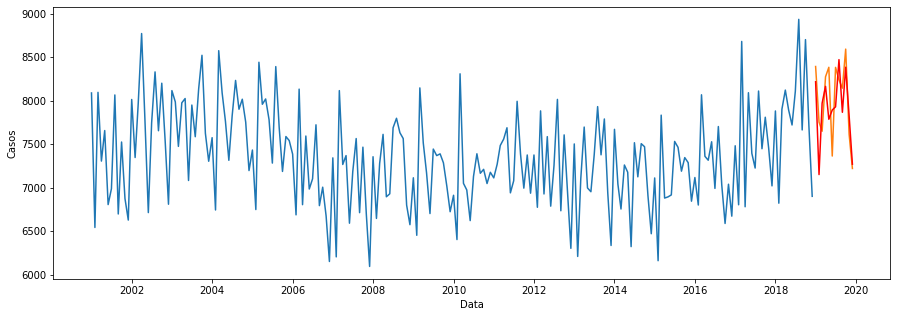

In [156]:
dados_treino = dados_st.query("Ano != 2019")
dados_teste = dados_st.query("Ano == 2019")

modelo_arima = ARIMA(dados_treino['Casos'].values.astype('float32'), order=[12,1,2])
modelo_arima_treinado = modelo_arima.fit()
previsao = modelo_arima_treinado.forecast(steps=12)[0]
plt.figure(figsize=(15,5))
sns.lineplot(x='Data', y='Casos', data=dados_treino)
sns.lineplot(x='Data', y='Casos', data=dados_teste)
sns.lineplot(x=dados_teste['Data'], y=previsao, color='r');

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have

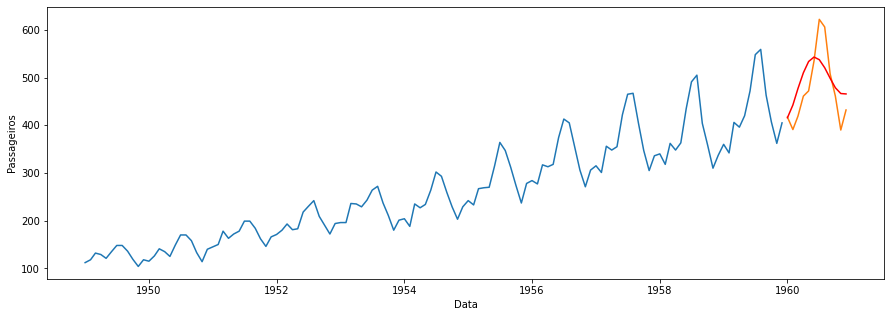

In [175]:
#order (p,d,q) = parâmetros: p = Auto Regressive Parameter/ d=Integrative parameter / q = MA - Moving Average Parameter
dados_treino = dados_passageiros.query("Ano != 1960")
dados_teste = dados_passageiros.query("Ano == 1960")

modelo_arima = ARIMA(dados_treino['Passageiros'].values.astype('float32'), order=[2,1,2])
modelo_arima_treinado = modelo_arima.fit()
previsao_passageiros = modelo_arima_treinado.forecast(steps=12)[0]
plt.figure(figsize=(15,5))
sns.lineplot(x='Data', y='Passageiros', data=dados_treino)
sns.lineplot(x='Data', y='Passageiros', data=dados_teste)
sns.lineplot(x=dados_teste['Data'], y=previsao_passageiros, color='r');

## **AULA 06 - AUTOARIMA E PROPHET**

In [143]:
#!pip install pmdarima

In [144]:
from pmdarima.arima import auto_arima

In [176]:
dados_treino = dados_st.query("Ano != 2019")
dados_teste = dados_st.query("Ano == 2019")

In [177]:
#incluindo sazonalidade no modelo (parâmetro "m")
modelo_autoarima = auto_arima(dados_treino['Casos'].values,error_action='ignore', trace=True,
                              seasonal=True, m=12)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,0,1)[12] intercept   : AIC=inf, Time=nan sec
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=3462.510, Time=0.02 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=3289.199, Time=0.34 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=3249.086, Time=0.65 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=3460.524, Time=0.01 sec
 ARIMA(0,1,1)(0,0,0)[12] intercept   : AIC=3312.298, Time=0.15 sec
 ARIMA(0,1,1)(1,0,1)[12] intercept   : AIC=inf, Time=1.21 sec
 ARIMA(0,1,1)(0,0,2)[12] intercept   : AIC=3246.454, Time=1.69 sec
 ARIMA(0,1,1)(1,0,2)[12] intercept   : AIC=inf, Time=4.01 sec
 ARIMA(0,1,0)(0,0,2)[12] intercept   : AIC=3398.593, Time=1.03 sec
 ARIMA(1,1,1)(0,0,2)[12] intercept   : AIC=3242.479, Time=2.16 sec
 ARIMA(1,1,1)(0,0,1)[12] intercept   : AIC=3246.995, Time=0.85 sec
 ARIMA(1,1,1)(1,0,2)[12] intercept   : AIC=inf, Time=3.53 sec
 ARIMA(1,1,1)(1,0,1)[12] intercept   : AIC=inf, Time=1.07 sec
 ARIMA(1,1,0)(0,0,2)[12] intercept   : AIC=33

In [150]:
modelo_autoarima

ARIMA(maxiter=50, method='lbfgs', order=(1, 1, 1), out_of_sample_size=0,
      scoring='mse', scoring_args={}, seasonal_order=(0, 0, 0, 0),
      start_params=None, suppress_warnings=True, trend=None,
      with_intercept=False)

In [152]:
#sem informação de sazonalidade
modelo_autoarima_alterado = auto_arima(dados_treino['Casos'].values,error_action='ignore', trace=True,
                                       max_p=12, max_d=4, max_q=12)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.56 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=3462.510, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=3366.610, Time=0.03 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=3312.298, Time=0.14 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=3460.524, Time=0.01 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=3309.482, Time=0.24 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=3310.770, Time=0.37 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=3311.065, Time=0.35 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=3310.088, Time=0.24 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=3344.652, Time=0.05 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=3307.835, Time=0.11 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=3310.594, Time=0.07 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=3364.610, Time=0.02 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=3309.098, Time=0.18 sec
 ARIMA(1,1,2)(0,0,0)[0]             : 

In [153]:
modelo_autoarima_alterado

ARIMA(maxiter=50, method='lbfgs', order=(1, 1, 1), out_of_sample_size=0,
      scoring='mse', scoring_args={}, seasonal_order=(0, 0, 0, 0),
      start_params=None, suppress_warnings=True, trend=None,
      with_intercept=False)

In [160]:
modelo_autoarima.predict(12)

array([7945.87236724, 7778.65152982, 7805.38787867, 7801.11309832,
       7801.79657785, 7801.68729872, 7801.70477097, 7801.7019774 ,
       7801.70242405, 7801.70235264, 7801.70236406, 7801.70236223])

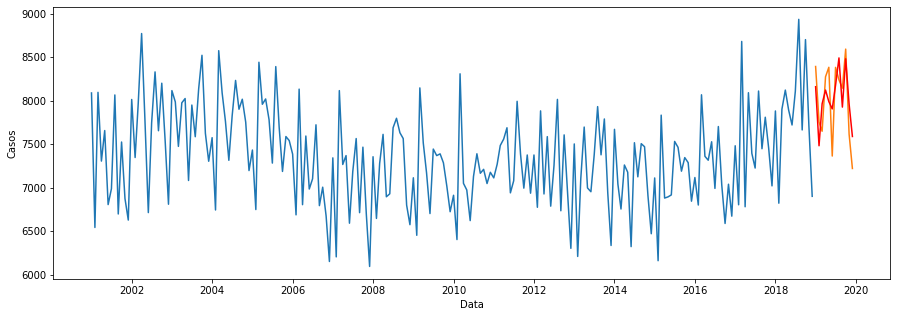

In [164]:
previsao_autoarima = modelo_autoarima.predict(12)
plt.figure(figsize=(15,5))
sns.lineplot(x='Data', y='Casos', data=dados_treino)
sns.lineplot(x='Data', y='Casos', data=dados_teste)
sns.lineplot(x=dados_teste['Data'], y=previsao_autoarima, color='r');

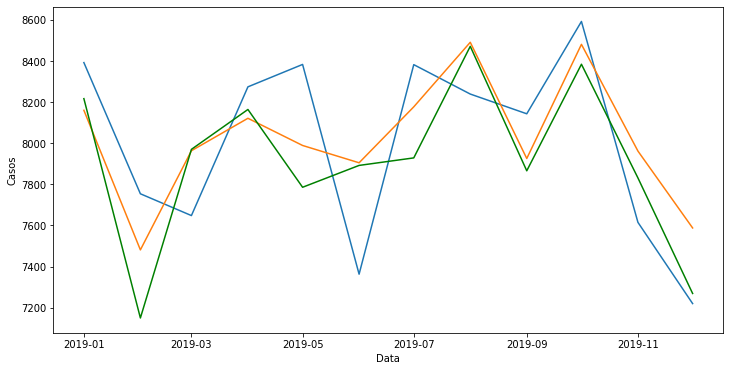

In [171]:
plt.figure(figsize=(12,6))
sns.lineplot(x='Data', y='Casos', data=dados_teste)
sns.lineplot(x=dados_teste['Data'], y=previsao_autoarima)
sns.lineplot(x=dados_teste['Data'], y=previsao, color='g');

In [172]:
#conferindo qual foi o melhor modelo, a previsão manual ou o autoarima
from sklearn.metrics import mean_squared_error

In [173]:
resultado_autoarima = mean_squared_error(dados_teste['Casos'], previsao_autoarima)
resultado_manual = mean_squared_error(dados_teste['Casos'], previsao)

In [178]:
print("Autoarima: ", resultado_autoarima)
print("Manual: ", resultado_manual)

Autoarima:  93378.93287884665
Manual:  131383.85582347822


In [179]:
#usando o Prophet
from fbprophet import Prophet

In [185]:
dados_treino_passageiros = dados_passageiros.query("Ano != 1960")
dados_teste_passageiros = dados_passageiros.query("Ano == 1960")


In [186]:
#Prophet exige que as colunas tenham nomes específicos
colunas={'Data':'ds', 'Passageiros':'y'}
treino_profeta_p = dados_treino_passageiros[['Data', 'Passageiros']].rename(colunas, axis=1)
teste_profeta_p = dados_teste_passageiros[['Data', 'Passageiros']].rename(colunas, axis=1)


In [196]:
#instanciando o modelo
modelo_profeta = Prophet(seasonality_mode='multiplicative')

In [197]:
#treinando o modelo
modelo_profeta_treinado = modelo_profeta.fit(treino_profeta_p)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [198]:
#criando a previsão do modelo
#para o prophet há mais passos para fazer a previsão. 1) Criar o 'FUTURO"
futuro = modelo_profeta_treinado.make_future_dataframe(periods=12,freq='M')
futuro

,ds
0,1949-01-01
1,1949-02-01
2,1949-03-01
3,1949-04-01
4,1949-05-01
...,...
139,1960-07-31
140,1960-08-31
141,1960-09-30
142,1960-10-31


In [199]:
#fazendo a previsão - recebe o futuro criado acima como parâmetro
resultado_profeta = modelo_profeta_treinado.predict(futuro)

In [200]:
resultado_profeta

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yearly,yearly_lower,yearly_upper,additive_terms,additive_terms_lower,additive_terms_upper,yhat
0,1949-01-01,115.603966,91.562293,115.760317,115.603966,115.603966,-0.101135,-0.101135,-0.101135,-0.101135,-0.101135,-0.101135,0.0,0.0,0.0,103.912403
1,1949-02-01,117.275019,86.391962,111.600897,117.275019,117.275019,-0.154216,-0.154216,-0.154216,-0.154216,-0.154216,-0.154216,0.0,0.0,0.0,99.189377
2,1949-03-01,118.784358,104.960492,132.227097,118.784358,118.784358,0.002721,0.002721,0.002721,0.002721,0.002721,0.002721,0.0,0.0,0.0,119.107520
3,1949-04-01,120.455412,103.539488,128.713365,120.455412,120.455412,-0.033256,-0.033256,-0.033256,-0.033256,-0.033256,-0.033256,0.0,0.0,0.0,116.449565
4,1949-05-01,122.072561,105.542223,131.499814,122.072561,122.072561,-0.027357,-0.027357,-0.027357,-0.027357,-0.027357,-0.027357,0.0,0.0,0.0,118.733027
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
139,1960-07-31,464.860836,571.630366,596.978630,464.147290,465.620862,0.257393,0.257393,0.257393,0.257393,0.257393,0.257393,0.0,0.0,0.0,584.512761
140,1960-08-31,467.660516,474.767070,499.665610,466.744532,468.594662,0.041049,0.041049,0.041049,0.041049,0.041049,0.041049,0.0,0.0,0.0,486.857711
141,1960-09-30,470.369885,414.290786,441.389168,469.292759,471.445504,-0.091353,-0.091353,-0.091353,-0.091353,-0.091353,-0.091353,0.0,0.0,0.0,427.400268
142,1960-10-31,473.169565,360.196368,385.959396,471.926067,474.396818,-0.210581,-0.210581,-0.210581,-0.210581,-0.210581,-0.210581,0.0,0.0,0.0,373.529040


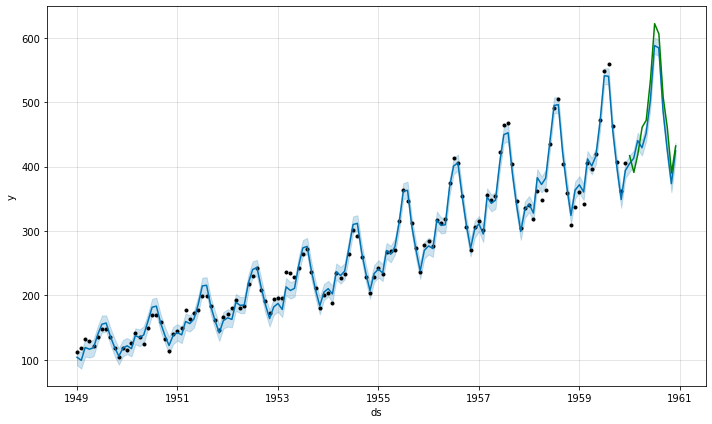

In [204]:
#plotando o resultado
modelo_profeta_treinado.plot(resultado_profeta)
sns.lineplot(x=dados_teste_passageiros['Data'], y=dados_teste_passageiros['Passageiros'], color='g');